In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

# Literature

**Competition Page**: https://mofc.unic.ac.cy/the-m6-competition/

**Competitio Guidelines**: https://mofc.unic.ac.cy/wp-content/uploads/2022/01/P3590-M6-Guidelines-1.pdf

**Leaderboard**: https://m6competition.com/Leaderboard

**Github**: https://github.com/Mcompetitions/M6-methods



**Ranking**

+ https://everdark.github.io/k9/notebooks/ml/learning_to_rank/learning_to_rank.html

+ https://bozkurtturanyigit.medium.com/forecasting-many-stock-assets-with-one-ml-model-4e581f799588



**Other competitors**

+ https://github.com/edu230991/m6-competition

+ https://github.com/microprediction/m6/tree/main/notebook_examples

+ https://medium.com/geekculture/using-the-precise-package-to-enter-the-m6-financial-forecasting-contest-f939dce2dff9

In [2]:
assets = pd.read_csv("https://storage.googleapis.com/m6-bucket-webapp-public/M6_Universe.csv")
display(assets.head())

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


In [3]:
df = yf.download(list(assets['symbol'].values))
display(df.head())

[*********************100%***********************]  100 of 100 completed


Adj Close                                               ... Volume  \
                ABBV ACN       AEP AIZ ALLE AMAT AMP AMZN AVB AVY  ...    XLC   
Date                                                               ...          
1962-01-02       NaN NaN  1.035685 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-03       NaN NaN  1.033799 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-04       NaN NaN  1.018706 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-05       NaN NaN  0.996069 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-08       NaN NaN  0.988522 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   

                                                       
           XLE XLF XLI XLK XLP XLU XLV XLY        XOM  
Date                                                   
1962-01-02 NaN NaN NaN NaN NaN NaN NaN NaN   902400.0  
1962-01-03 NaN NaN NaN NaN NaN NaN NaN NaN  1200000.0  
1962-01-04 NaN NaN NaN NaN NaN NaN NaN NaN  1088000.0  
1962-01-05 NaN NaN NaN NaN NaN NaN NaN NaN  1222400.0  
1962-01-08 NaN NaN NaN NaN NaN NaN NaN NaN  1388800.0  

[5 rows x 600 columns]

## Group Into 20-day returns

In [38]:
df2 = df.iloc[-3000:][['Adj Close']].reset_index().fillna(method='ffill')
temp = df2.groupby(df2.index // 20).nth(0)
df2 = np.log(df2.groupby(df2.index // 20).nth(-1).iloc[:, 1:] / temp.iloc[:, 1:]).set_index(temp.iloc[:, 0])
# No ties in dataset
# (df2.apply(lambda x: len(np.unique(x[~np.isnan(x)])), axis = 1) == (~df2.isnull()).sum(axis = 1)).sum()

df2.index.name = "Date"
df2.columns = list(df2.columns.levels[1][:-1])

df2

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,NaN,0.025102,0.034486,0.036428,NaN,-0.020018,0.127388,0.093259,0.048746,0.072888,...,NaN,0.069719,0.045090,0.089007,0.053078,0.024987,0.045568,0.023209,0.065223,0.064368
2010-08-05,NaN,-0.066458,0.003329,0.003134,NaN,-0.091437,0.052732,0.035806,0.057571,-0.069443,...,NaN,-0.058507,-0.057277,-0.056703,-0.051435,-0.002964,0.017626,-0.030824,-0.032139,-0.021994
2010-09-02,NaN,0.107464,0.016594,0.070551,NaN,0.079258,0.037202,0.162012,-0.032504,0.081501,...,NaN,0.050037,0.012738,0.061418,0.080015,0.038325,0.010206,0.061307,0.054974,0.008642
2010-09-30,NaN,0.064390,0.016968,0.014634,NaN,0.046831,0.071736,0.064415,0.042110,0.023167,...,NaN,0.056693,0.015901,0.028987,0.054524,0.024447,0.006670,0.020452,0.049631,0.060901
2010-10-28,NaN,-0.016162,-0.020227,-0.116158,NaN,0.032979,-0.019835,0.060526,0.043012,0.043364,...,NaN,0.066490,0.003423,0.025808,0.007377,0.000697,-0.019127,-0.014481,0.037289,0.060073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,0.085078,0.078567,-0.002417,-0.013822,0.002592,0.162646,0.069049,0.022494,0.046759,0.072125,...,0.003577,0.003133,0.015816,0.037553,0.062139,0.034214,0.024299,0.051447,0.063143,0.033290
2021-11-15,0.071261,0.029391,0.013304,-0.028228,-0.022483,-0.021301,-0.032605,-0.029027,-0.002284,-0.051563,...,-0.060210,-0.013707,-0.027780,-0.016475,0.045268,0.013571,0.023706,0.011960,0.006706,-0.021354
2021-12-13,0.064064,-0.018625,0.066243,0.029601,-0.027058,0.024908,0.086599,-0.042241,0.009535,0.012315,...,0.003888,0.110215,0.068460,0.024929,-0.035665,0.036458,0.013670,-0.007267,0.000344,0.111217


In [39]:
from tqdm import tqdm
quantiles = df2.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], labels=False), axis = 1)
df3 = pd.DataFrame()
for i in tqdm(range(100)):
    temp = quantiles.iloc[:, [i]].rename({quantiles.columns[i]:"next_rank"}, axis = 1).shift(-1)
    temp['asset'] = quantiles.columns[i]
    temp['next_ret'] = df2.iloc[:, i].shift(-1)
    temp = pd.concat([df2, temp], axis = 1)
    df3 = pd.concat([df3, temp])
df3

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 130.11it/s]


,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,next_rank,asset,next_ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,NaN,0.025102,0.034486,0.036428,NaN,-0.020018,0.127388,0.093259,0.048746,0.072888,...,0.089007,0.053078,0.024987,0.045568,0.023209,0.065223,0.064368,NaN,ABBV,NaN
2010-08-05,NaN,-0.066458,0.003329,0.003134,NaN,-0.091437,0.052732,0.035806,0.057571,-0.069443,...,-0.056703,-0.051435,-0.002964,0.017626,-0.030824,-0.032139,-0.021994,NaN,ABBV,NaN
2010-09-02,NaN,0.107464,0.016594,0.070551,NaN,0.079258,0.037202,0.162012,-0.032504,0.081501,...,0.061418,0.080015,0.038325,0.010206,0.061307,0.054974,0.008642,NaN,ABBV,NaN
2010-09-30,NaN,0.064390,0.016968,0.014634,NaN,0.046831,0.071736,0.064415,0.042110,0.023167,...,0.028987,0.054524,0.024447,0.006670,0.020452,0.049631,0.060901,NaN,ABBV,NaN
2010-10-28,NaN,-0.016162,-0.020227,-0.116158,NaN,0.032979,-0.019835,0.060526,0.043012,0.043364,...,0.025808,0.007377,0.000697,-0.019127,-0.014481,0.037289,0.060073,NaN,ABBV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,0.085078,0.078567,-0.002417,-0.013822,0.002592,0.162646,0.069049,0.022494,0.046759,0.072125,...,0.037553,0.062139,0.034214,0.024299,0.051447,0.063143,0.033290,2.0,XOM,-0.021354
2021-11-15,0.071261,0.029391,0.013304,-0.028228,-0.022483,-0.021301,-0.032605,-0.029027,-0.002284,-0.051563,...,-0.016475,0.045268,0.013571,0.023706,0.011960,0.006706,-0.021354,4.0,XOM,0.111217
2021-12-13,0.064064,-0.018625,0.066243,0.029601,-0.027058,0.024908,0.086599,-0.042241,0.009535,0.012315,...,0.024929,-0.035665,0.036458,0.013670,-0.007267,0.000344,0.111217,4.0,XOM,0.173102


In [50]:
# df3.loc[df3['next_rank'] == -1, 'next_rank'] = np.nan
oos = df3.loc[df3['next_rank'].isnull()].groupby('asset').last().copy().reset_index()

df3 = df3.loc[~df3['next_rank'].isnull()]
df3.loc[:, 'next_rank'] = df3.loc[:, 'next_rank'].astype(int)
df3.loc[:, 'asset'] = df3.loc[:, 'asset'].astype("category")
oos = oos.reset_index()
oos = oos.loc[:, df3.columns]
oos['asset'] = oos['asset'].astype('category')

In [41]:
df3 = (df3.
 reset_index().
 sort_values(by = 'Date').
 reset_index(drop = True).
 set_index('Date'))

In [42]:
_, groups = np.unique(df3.index, return_counts=True)

# Features

In the naive setup, consider long dataframes of the form

$$(N \times T) \text{ rows } \times F \text{ columns }$$

Let $T$ denote the collection of every 20 days

The label to predict is the relative ranking of asset returns in the next timestep

# Model

## Probability

Task is to actually predict CDF

+ Naive approach : Treat it as a multi-class classification problem
+ Directly minimise Mean Squared Error of CDF

Output is of shape $(\sum_{i = 1}^{n} T_{i} x N_{i}) \times 5$





### Classifier

**Inputs**: 

Predict out of sample label = quintile of 20 day returns, cross-sectional among 100 assets

**Loss Function**: 

+ Categorical cross entropy - treats as classification problem
+ MSE - consider MSE of cdf vs (actual metric) - seems to perform poorly




In [43]:
import lightgbm as lgb

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df3.iloc[:, list(range(100))], 
    df3.iloc[:, 100], 
    test_size = 0.3, 
    shuffle=False)

lgbc = lgb.LGBMClassifier(n_estimators=100, max_depth = 5, learning_rate = 0.01, reg_alpha = 1, reg_lambda = 1, objective="multiclass")
lgbc.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=5, objective='multiclass',
               reg_alpha=1, reg_lambda=1)

$$\frac{1}{5}\sum_{i = 0}^{4} (\sum_{j = 0}^{i} y_{j} - \sum_{j = 0}^{i} \hat{y_{j}})^{2} = (y_{0} - \hat{y}_{0})^{2} + (y_{0} + y_{1} - \hat{y}_{0} - \hat{y}_{1})^{2} \ldots $$

$$\frac{\partial L}{\partial m} =  -\frac{2}{5}\sum_{i = m}^{4}(\sum_{j = 0}^{i} y_{j} - \sum_{j = 0}^{i} \hat{y_{j}})$$

$-2(y_{0} - \hat{y}_{0}) - 2(y_{0} + y_{1} - \hat{y}_{0} - \hat{y}_{1})$

$$\frac{\partial^{2} L}{\partial m^{2}} = \frac{2}{5} (5 - m)$$

In [19]:
# def mse_objective(y_true, y_pred):
#     y_pred = y_pred.reshape((-1, y_true.shape[0])).T
#     y_pred = softmax(y_pred, axis = 1)
#     hess = 0.4 * (6 - np.cumsum(np.ones((y_pred.shape)), axis = 1)).T.reshape(-1).T
#     grad = -0.4 * np.cumsum(np.cumsum(pd.get_dummies(y_true), axis = 1) -  np.cumsum(y_pred, axis = 1), axis = 1).iloc[:, ::-1].values # N x 5
#     grad = grad.T.reshape(-1).T

#     return [grad, hess]

# grad, hess = mse_objective(y_test, lgbc2.predict_proba(X_test))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

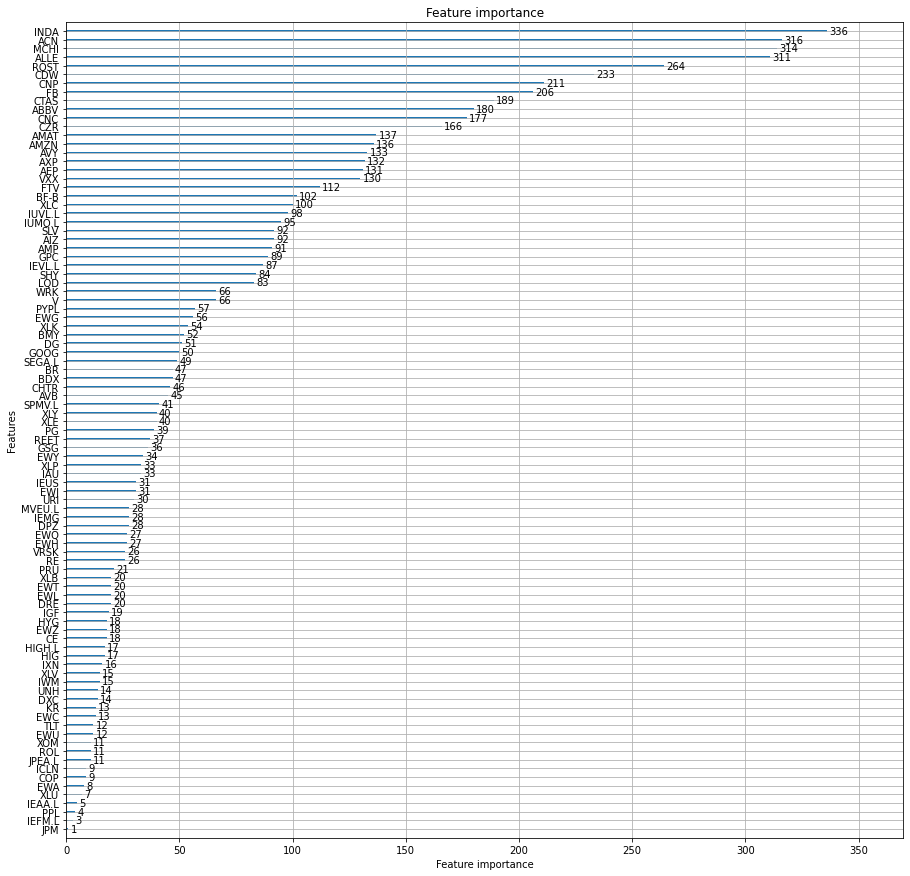

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
lgb.plot_importance(lgbc, ax = ax)

In [45]:
pred_proba_train = lgbc.predict_proba(X_train)
pred_proba_train_cdf = np.cumsum(pred_proba_train, axis = 1)
display(pred_proba_train_cdf)

y_train_cdf = np.cumsum(pd.get_dummies(y_train), axis =1)
baseline_train = np.cumsum(0.2 * np.ones((y_train.shape[0], 5)), axis = 1)
np.mean(np.mean((y_train_cdf - pred_proba_train_cdf) ** 2, axis = 1))

array([[0.20304289, 0.40120662, 0.60074289, 0.79919448, 1.        ],
       [0.20304289, 0.40120662, 0.60074289, 0.79919448, 1.        ],
       [0.20304289, 0.40120662, 0.60074289, 0.79919448, 1.        ],
       ...,
       [0.20580463, 0.39784354, 0.6083361 , 0.8019739 , 1.        ],
       [0.20580463, 0.39784354, 0.6083361 , 0.8019739 , 1.        ],
       [0.20580463, 0.39784354, 0.6083361 , 0.8019739 , 1.        ]])

0.16082387621246536

In [46]:
pred_proba_test = lgbc.predict_proba(X_test)
pred_proba_test_cdf = np.cumsum(pred_proba_test, axis = 1)
y_test_cdf = np.cumsum(pd.get_dummies(y_test), axis =1)

In [47]:
test_MSE = MSE(y_test_cdf, pred_proba_test_cdf).rename("MSE")
np.mean(test_MSE)

NameError: name 'MSE' is not defined

In [379]:
pred_proba_train = softmax(lgbc2.predict_proba(X_train), axis = 1)
pred_proba_train_cdf = np.cumsum(pred_proba_train, axis = 1)
np.mean(np.mean((y_train_cdf - pred_proba_train_cdf) ** 2, axis = 1))


/usr/local/lib/python3.9/site-packages/lightgbm/sklearn.py:999: UserWarning: Cannot compute class probabilities or labels due to the usage of customized objective function.
Returning raw scores instead.
  _log_warning("Cannot compute class probabilities or labels "


0.16089661178379608

In [380]:
pred_proba_test = softmax(lgbc2.predict_proba(X_test), axis = 1)
pred_proba_test_cdf = np.cumsum(pred_proba_test, axis = 1)
np.mean(np.mean((y_test_cdf - pred_proba_test_cdf) ** 2, axis = 1))


0.16062741762436447

In [302]:
pred_proba_train = softmax(lgbc2.predict_proba(X_train), axis = 1)
pred_proba_train_cdf = np.cumsum(pred_proba_train, axis = 1)
np.mean(np.mean((pred_proba_train_cdf - y_train_cdf) ** 2, axis = 1))


0.17229234030630286

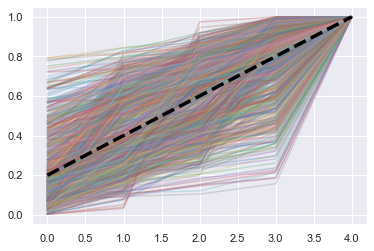

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.plot(np.cumsum(pred_proba[:1000],axis = 1).T, alpha=0.3);
plt.plot(np.cumsum(0.2 * np.ones((1, 5))), linewidth=3.5, linestyle="--", c = 'black')

In [485]:
y_test = pd.get_dummies(df3['next_rank']).cumsum(axis = 1)
display(y_test)

,0,1,2,3,4
Date,,,,,
2010-06-22,1,1,1,1,1
2010-06-22,0,0,1,1,1
2010-06-22,1,1,1,1,1
2010-06-22,0,0,0,0,1
2010-06-22,0,0,0,1,1
...,...,...,...,...,...
2021-12-23,0,1,1,1,1
2021-12-23,0,1,1,1,1
2021-12-23,0,0,1,1,1


<AxesSubplot:ylabel='Count'>

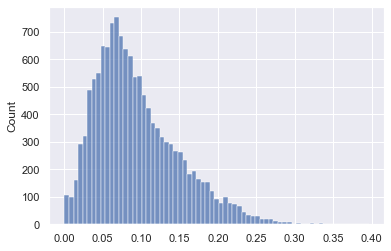

In [499]:
import seaborn as sns
sns.set();
sns.histplot(MSEs)

The evaluation metric is the mean mean squared error of the CDF for each of the 100 assets, over the time horizon

In [65]:
action =  pd.DataFrame(lgbc.predict_proba(oos.drop(['next_rank', 'next_ret','asset'], axis = 1)), index = oos['asset'])

In [66]:
action = action.reset_index()
action.columns = ["ID", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]

In [68]:
action.to_csv("submission.csv",index=False)